In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf




In [9]:
# Load and preprocess sunspot activity data
# Replace 'sunspot_data.csv' with the path to your dataset
data = pd.read_csv('sunspots.csv')
data.head()
data['Date'] = pd.to_datetime(data['YEAR'])
data.set_index('Date', inplace=True)

In [19]:
data.head()

,YEAR,SUNACTIVITY
Date,,
1970-01-01 00:00:00.000001700,1700,5.0
1970-01-01 00:00:00.000001701,1701,11.0
1970-01-01 00:00:00.000001702,1702,16.0
1970-01-01 00:00:00.000001703,1703,23.0
1970-01-01 00:00:00.000001704,1704,36.0


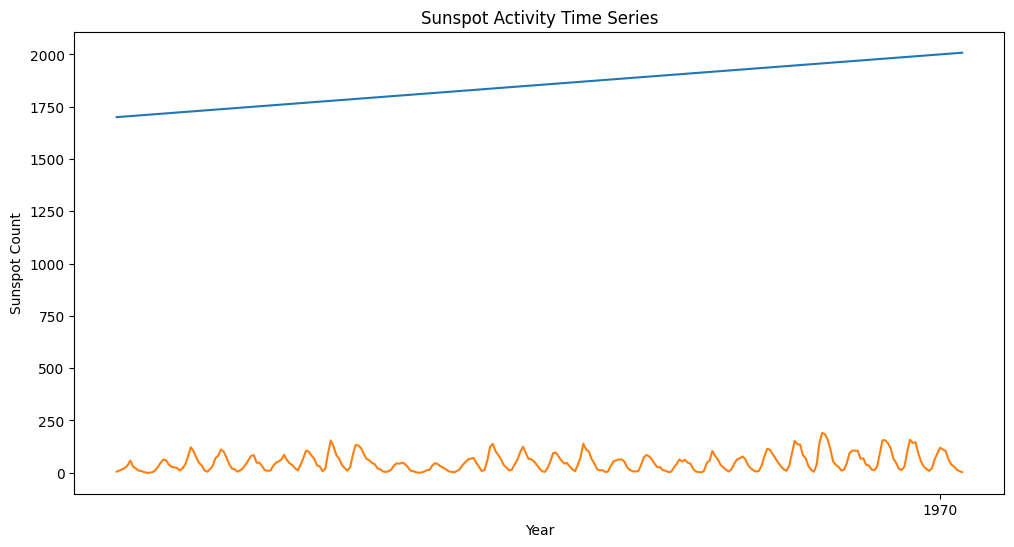

In [10]:
# EDA and visualization
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('Sunspot Activity Time Series')
plt.xlabel('Year')
plt.ylabel('Sunspot Count')
plt.show()

In [31]:
univariate_data = data["SUNACTIVITY"]
# Define SARIMA orders
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Example seasonal order

# Fit the SARIMA model
model = SARIMAX(univariate_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

/opt/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.37435D+00    |proj g|=  1.15156D-01

At iterate    5    f=  4.32814D+00    |proj g|=  2.17143D-02

At iterate   10    f=  4.27601D+00    |proj g|=  3.30939D-03

At iterate   15    f=  4.27598D+00    |proj g|=  1.68620D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     19      1     0     0   1.686D-05   4.276D+00
  F =   4.2759839813421863     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


                                     SARIMAX Results                                      
Dep. Variable:                        SUNACTIVITY   No. Observations:                  309
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1321.279
Date:                            Sun, 15 Oct 2023   AIC                           2652.558
Time:                                    22:05:55   BIC                           2671.010
Sample:                                01-01-1970   HQIC                          2659.946
                                     - 01-01-1970                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3455      0.098      3.508      0.000       0.152       0.539
ma.L1          0.2116      0.102   

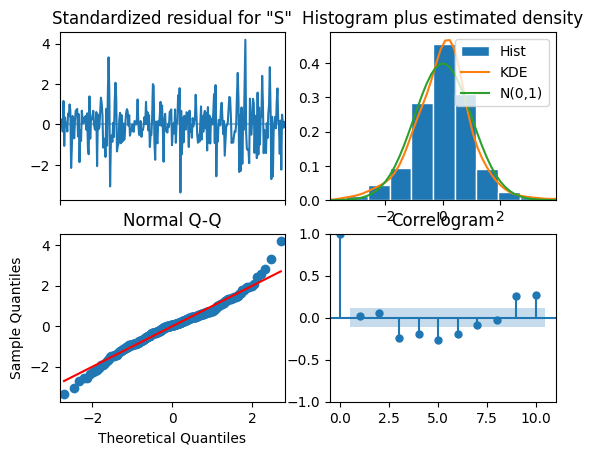

In [32]:
# Model diagnostics
print(results.summary())
results.plot_diagnostics()
plt.show()

In [33]:
# Split data into training and testing sets
train_size = int(0.8 * len(data))
train, test = data[:train_size], data[train_size:]

In [34]:
# Forecast future values
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)

In [35]:
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

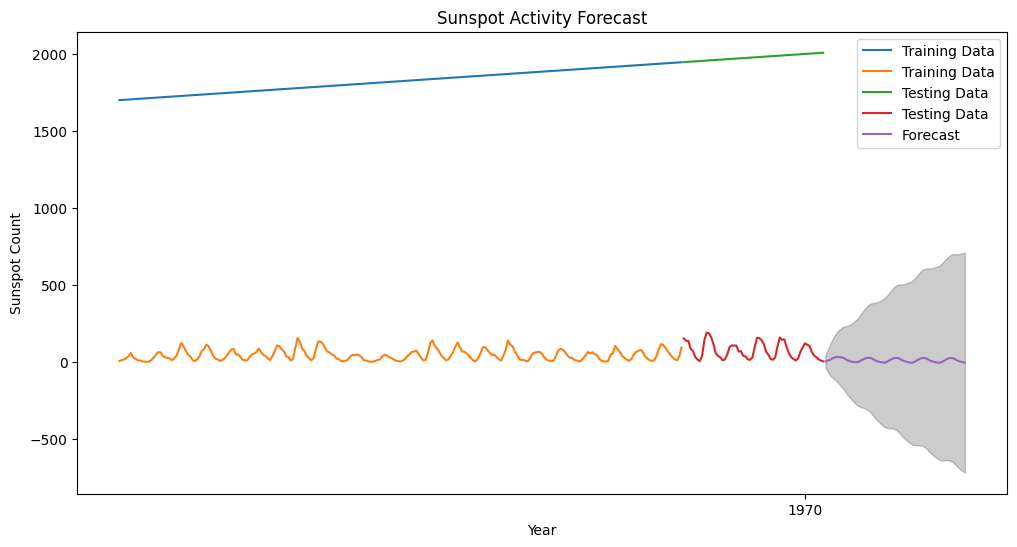

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(forecast_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.2)
plt.title('Sunspot Activity Forecast')
plt.xlabel('Year')
plt.ylabel('Sunspot Count')
plt.legend()
plt.show()